# The Curve - A statistical approach to Trading

The Curve is the statistical method that I have developed. This is not actually a trading system. The Curve gives you the probability of selected bar's closing range.

The Curve applies Empirical Rule (68-95-99.7). There are indicators that claim they are using the same. However most of them are using empirical rule in a wrong way. How can you use empirical rule if the distribution is not normal? The price is not in a normal distribution.

The Curve in the other hand uses opening price of the bar. But, opening price is not a normal distribution either. So I'm simply creating a nice bell curved shape using opening prices. And the range is going to be there at the beginning of the bar.

Here i will show you how i do it exactly!

Note that I'm using the daily EURUSD historical data, downloaded from investing.com. You can apply this method to any security assets (stocks, cryptocurrency, forex and etc.). Works with Bitcoin as well.

Let's get started!

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Let's load daily data of EURUSD first.
# You can use any time-frame (1min - 1month and etc.)
# I have downloaded the historical data from investing.com

file = "./1d EUR_USD.csv"
df = pd.read_csv(file)

# I'm going to use last 3 years (252 trading days in a year)
df = df[-756:]

In [17]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'], format="%b %d, %Y")
# Rename Price column to Close
df.rename(columns={'Price': 'Close'}, inplace=True)
# Get rid of unnecessary columns
df.drop('Change %', axis=1, inplace=True)

In [18]:
df.tail()

,Date,Close,Open,High,Low
10007,2018-08-06,1.1554,1.1571,1.1574,1.1527
10008,2018-08-07,1.1599,1.1555,1.1610,1.1547
10009,2018-08-08,1.1611,1.1598,1.1629,1.1571
10010,2018-08-09,1.1527,1.1609,1.1620,1.1525
10011,2018-08-10,1.1411,1.1524,1.1536,1.1388


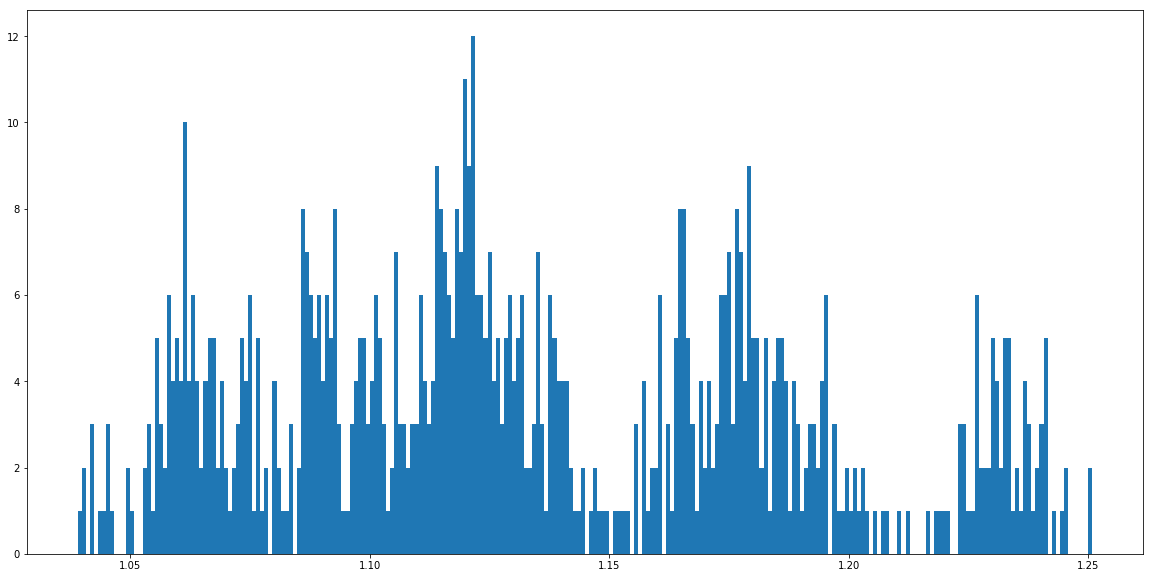

In [40]:
# Now let's plot and take a look at Open price
plt.figure(figsize=(20,10))
plt.hist(df['Open'], bins=250)
plt.show()

As you can see, the price is not in a bell curved shape. Actually it is but partially. This more seems like seasonal trends to me.

Here comes my calculation. I am simply creating the bell curved shape by simply dividing the Close price of the previous bar with the Open price of the previous bar to find out the percentage during the session for each day.

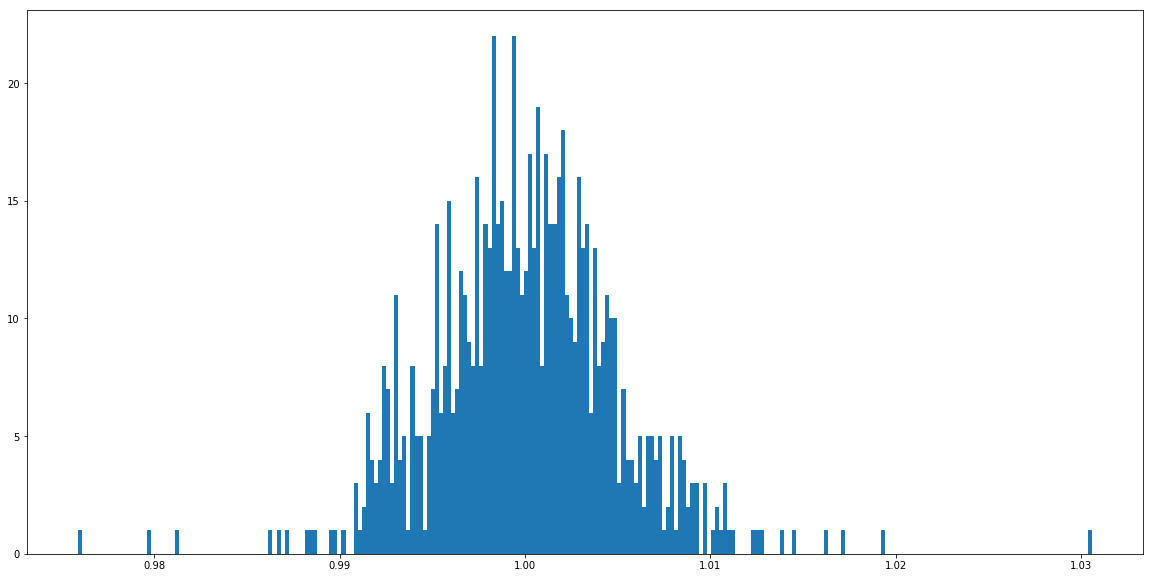

In [41]:
df['Curve'] = df['Close'].shift(1)/df['Open'].shift(1)

# The Curve column now holds percent change of each bar. Let's plot it!
plt.figure(figsize=(20,10))
plt.hist(df['Curve'].dropna(), bins=250)
plt.show()

As you can see this is almost a perfect bell curved shape!

Empirical Rule states that 68% of data falls within the first standard deviation, 95% of data falls within the second standard deviation and 99.7% of data falls within the third standard deviation from the mean.

Now let's calculate the ranges...

Mean: 1.00004
Std: 0.00499


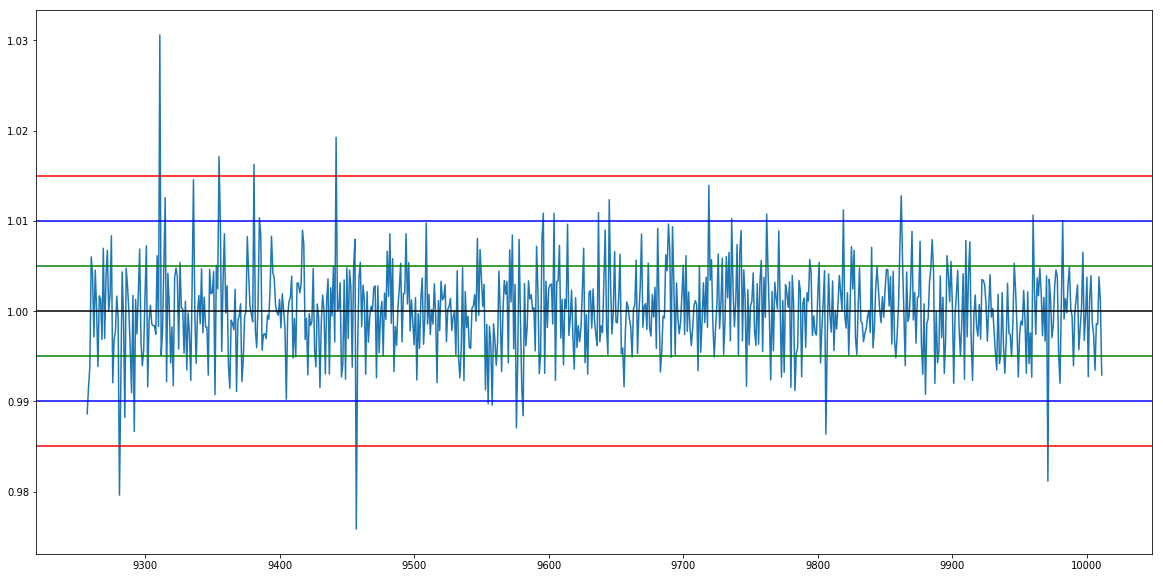

In [39]:
# find the mean of the curve
mean = df['Curve'].mean()
# find the standard deviation of the curve
std = df['Curve'].std()
# print them
print("Mean: {:.5f}\nStd: {:.5f}".format(mean, std))
# Let's plot it as lines
plt.figure(figsize=(20,10))
plt.plot(df['Curve'])
# plot the mean
plt.axhline(mean, color='000')
# plot 99.7% range
plt.axhline(mean+std*3, color='r')
plt.axhline(mean-std*3, color='r')
# plot 95% range
plt.axhline(mean+std*2, color='b')
plt.axhline(mean-std*2, color='b')
# plot 68% range
plt.axhline(mean+std, color='g')
plt.axhline(mean-std, color='g')

plt.show()

You can see the mean is almost 1.

Here is the tricky part. We have calculated the Curve (actual change in %) and now we know the range. All we need to do is multiply the (mean + std) with the Open price of the bar.

In [29]:
# let's find the possible ranges
df['OVB3'] = df['Open'] * (mean + std*3)
df['OVB2'] = df['Open'] * (mean + std*2)
df['OVB1'] = df['Open'] * (mean + std)
df['OVS1'] = df['Open'] * (mean - std)
df['OVS2'] = df['Open'] * (mean - std*2)
df['OVS3'] = df['Open'] * (mean - std*3)

Let's plot candles and the range

In [35]:
def plot_range(df, days):
    # plot last 60 days
    df = df[-days:].reset_index(drop=True).reset_index()
    # calculate Bar size and Body size
    df['Bar'] = df['High']-df['Low']
    df['Body'] = abs(df['Close']-df['Open'])
    plt.figure(figsize=(20,10))
    # plot candles
    # I know this is a tricky way but it works
    lows = np.where(df['Open']<df['Close'], df['Open'], df['Close'])
    # is it a green bar or red bar?
    clr = np.where(df['Open']>df['Close'], 'r', 'g')
    plt.bar(df['index'], bottom=df['Low'], height=df['Bar'], color='#000000', width=0.3)
    plt.bar(df['index'], bottom=lows, height=df['Body'], color=clr)
    # plot 68% probability range
    plt.plot(df['index'], df[['OVB1', 'OVS1']], color='g', alpha=0.3)
    # plot 95% probability range
    plt.plot(df['index'], df[['OVB2', 'OVS2']], color='b', alpha=0.3)
    # plot 99.7% probability range
    plt.plot(df['index'], df[['OVB3', 'OVS3']], color='r', alpha=0.3)
    plt.title("EURUSD 1d")
    plt.show() 

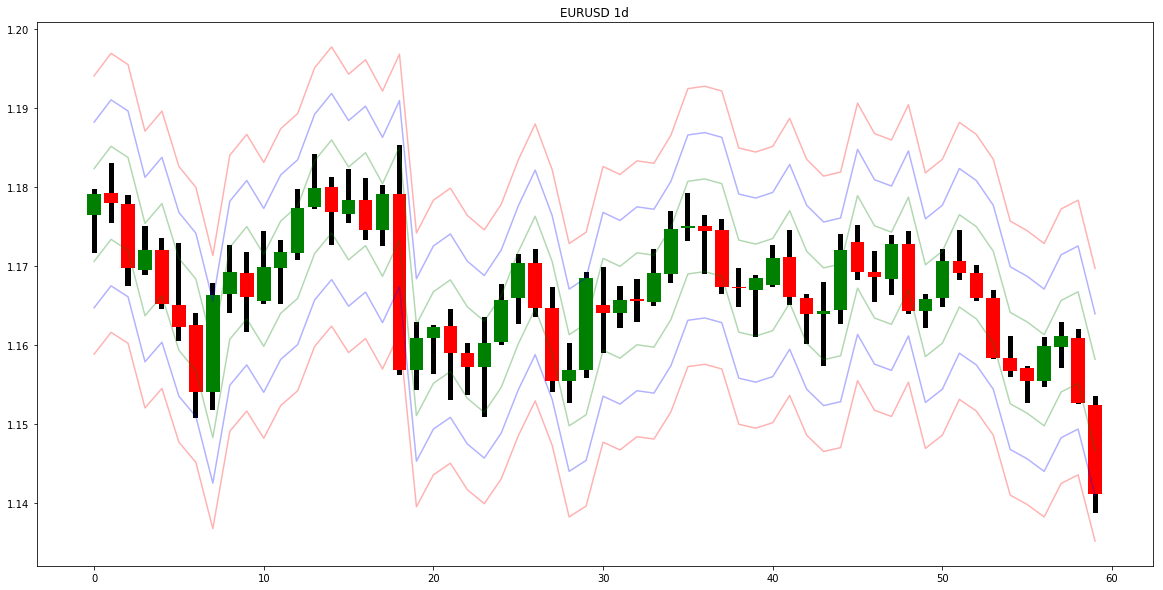

In [36]:
plot_range(df, 60)

# Definition of lines / range

Green: There is 68% probability that Bar will be closed within this range

Blue: There is 95% probability that Bar will be closed within this range

Red: There is 99.7% probability that Bar will be closed within this range


# What did we do here?

What we did here is very simple. We have calculated how far can a day close from Opening price. We have divided instead of subtracting because the value may change as price change. You can try subtracting but i would stick with dividing.

# Conclusion

You can use this model with any timeframe and any security assets. We have used Open prices so you have the range/lines at the very beginning of the bar/session. The opening gap is not important for us.

I'm going to post another solution sooner using a different statistical model. Please follow me to keep in touch.

I hope you enjoyed! Please remember to leave some comments. I will be more than happy to read your feedbacks.

Thanks,

Atilla Yurtseven

Follow me on Twitter - @atillayurtseven